In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!nvidia-smi

Thu Jun  5 04:01:01 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   44C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [6]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 55.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 57.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 49.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 35.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 66.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

In [7]:
 from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [5]:
!pip install roboflow

In [6]:
from roboflow import Roboflow
rf = Roboflow(api_key="0YOIxlpYtePWBqfaq4gu")
project = rf.workspace("deneme-tfvg6").project("tumorneuro")
version = project.version(1)
dataset = version.download("yolov11")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to tumorneuro-1 in yolov11:: 100%|██████████| 36724/36724 [00:07<00:00, 5091.06it/s]


### **Dataset Visualization**

In [7]:
# Verify Dataset Structure
import os
os.listdir("tumorneuro-1")  # Should show train, valid, test, and data.yaml

['README.roboflow.txt',
 'train',
 'README.dataset.txt',
 'test',
 'valid',
 'data.yaml']

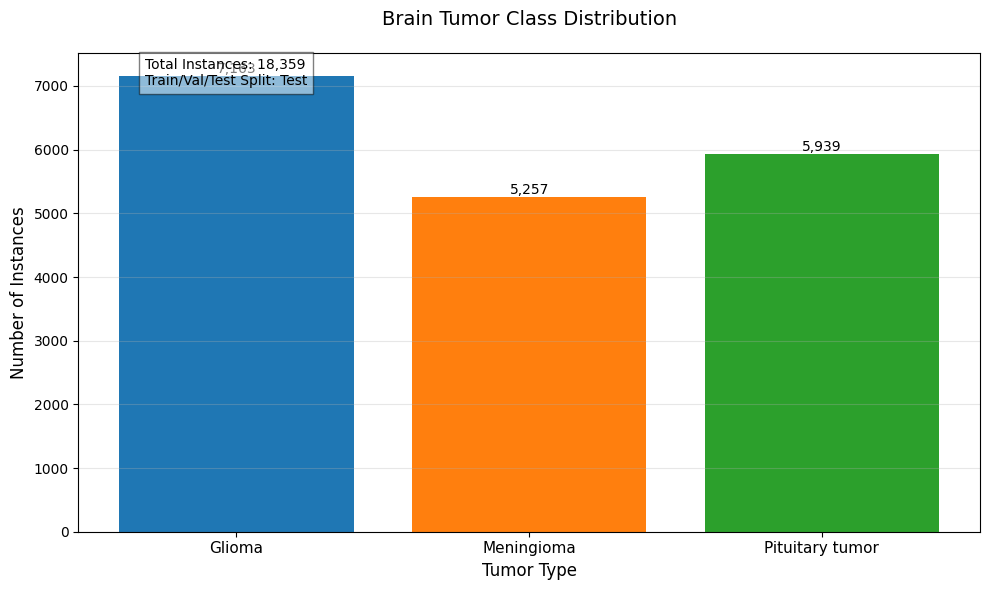

In [8]:
import os
import matplotlib.pyplot as plt
from collections import defaultdict

# Class names from your data.yaml
class_names = ['Glioma', 'Meningioma', 'Pituitary tumor']

# Initialize counter
class_counts = defaultdict(int)

# Directory where dataset was downloaded
dataset_base = "tumorneuro-1"

# Process all splits (train, valid, test)
for split in ['train', 'valid', 'test']:
    label_dir = os.path.join(dataset_base, split, 'labels')

    # Verify labels directory exists
    if not os.path.exists(label_dir):
        print(f"Warning: {label_dir} not found, skipping")
        continue

    # Count annotations in all label files
    for label_file in os.listdir(label_dir):
        if label_file.endswith('.txt'):
            with open(os.path.join(label_dir, label_file), 'r') as f:
                for line in f:
                    class_id = int(line.strip().split()[0])
                    class_counts[class_id] += 1

# Convert to class names and sort
sorted_classes = sorted(class_counts.items())
class_labels = [class_names[cls_id] for cls_id, _ in sorted_classes]
count_values = [count for _, count in sorted_classes]

# Create bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(class_labels, count_values, color=['#1f77b4', '#ff7f0e', '#2ca02c'])

# Add counts on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:,}',
             ha='center', va='bottom')

plt.title('Brain Tumor Class Distribution', fontsize=14, pad=20)
plt.xlabel('Tumor Type', fontsize=12)
plt.ylabel('Number of Instances', fontsize=12)
plt.xticks(fontsize=11)
plt.grid(axis='y', alpha=0.3)

# Add dataset info box
textstr = '\n'.join((
    f'Total Instances: {sum(count_values):,}',
    f'Train/Val/Test Split: {split.capitalize()}'))
plt.gcf().text(0.15, 0.85, textstr, fontsize=10,
               bbox=dict(facecolor='white', alpha=0.5))

plt.tight_layout()
plt.show()

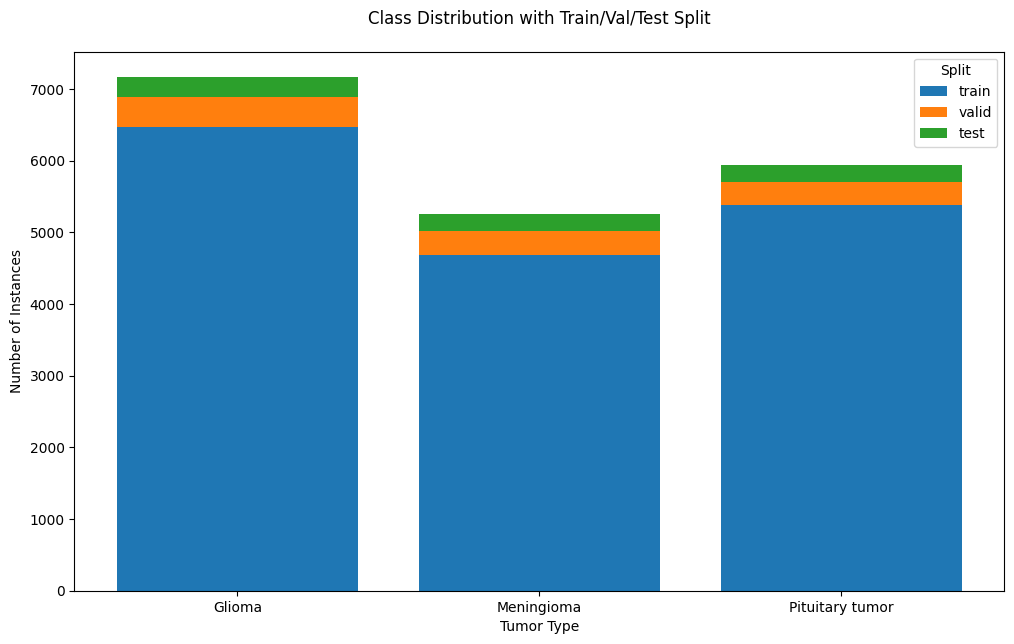

In [9]:
# Initialize nested counter
split_counts = {split: defaultdict(int) for split in ['train', 'valid', 'test']}

for split in ['train', 'valid', 'test']:
    label_dir = os.path.join(dataset_base, split, 'labels')

    if not os.path.exists(label_dir):
        continue

    for label_file in os.listdir(label_dir):
        if label_file.endswith('.txt'):
            with open(os.path.join(label_dir, label_file), 'r') as f:
                for line in f:
                    class_id = int(line.strip().split()[0])
                    split_counts[split][class_id] += 1

# Plot stacked bars
fig, ax = plt.subplots(figsize=(12, 7))
split_colors = {'train': '#1f77b4', 'valid': '#ff7f0e', 'test': '#2ca02c'}

for i, class_name in enumerate(class_names):
    bottom = 0
    for split in ['train', 'valid', 'test']:
        count = split_counts[split][i]
        ax.bar(class_name, count, bottom=bottom,
               color=split_colors[split], label=split if i == 0 else "")
        bottom += count

ax.set_title('Class Distribution with Train/Val/Test Split', pad=20)
ax.set_xlabel('Tumor Type')
ax.set_ylabel('Number of Instances')
ax.legend(title='Split')
plt.show()

### **Model Training**

In [10]:
# Load a model
model = YOLO("yolo11n-seg.pt")

# Train the model
train_results = model.train(
    data="/content/tumorneuro-1/data.yaml",  # path to dataset YAML
    epochs=10,  # number of training epochs
    imgsz=640,  # training image size
    batch=16,
    device=0,  # to run on gpu
)

100%|██████████| 5.90M/5.90M [00:00<00:00, 130MB/s]


Ultralytics 8.3.150 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/tumorneuro-1/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n-seg.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretra

100%|██████████| 755k/755k [00:00<00:00, 18.5MB/s]

Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

YOLO11n-seg summary: 203 layers, 2,843,193 parameters, 2,843,177 gradients, 10.4 GFLOPs

Transferred 510/561 items from pretrained weights
Freezing layer 'model.23.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 98.8MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1144.4±471.6 MB/s, size: 32.7 KB)


train: Scanning /content/tumorneuro-1/train/labels... 16523 images, 0 backgrounds, 0 corrupt: 100%|██████████| 16523/16523 [00:08<00:00, 1991.80it/s]


train: New cache created: /content/tumorneuro-1/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 475.7±288.7 MB/s, size: 34.9 KB)


val: Scanning /content/tumorneuro-1/valid/labels... 1091 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1091/1091 [00:01<00:00, 892.04it/s]

val: New cache created: /content/tumorneuro-1/valid/labels.cache


Plotting labels to runs/segment/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 90 weight(decay=0.0), 101 weight(decay=0.0005), 100 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/segment/train
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/10      2.76G       1.36       2.33      2.516      1.335         11        640: 100%|██████████| 1033/1033 [06:09<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:13<00:00,  2.54it/s]

                   all       1091       1091      0.606      0.576      0.604      0.382      0.598      0.572      0.598      0.377



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/10      3.38G      1.349      2.219      1.315      1.325         11        640: 100%|██████████| 1033/1033 [05:54<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:13<00:00,  2.60it/s]


                   all       1091       1091      0.686      0.668      0.708      0.459      0.702      0.664      0.713       0.45

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/10       3.4G      1.303       2.12      1.126      1.293         11        640: 100%|██████████| 1033/1033 [05:57<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:14<00:00,  2.49it/s]

                   all       1091       1091      0.674      0.682      0.724      0.483      0.687      0.681      0.725      0.479



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/10      3.41G      1.253      2.022      1.015      1.266         11        640: 100%|██████████| 1033/1033 [05:58<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:13<00:00,  2.50it/s]

                   all       1091       1091      0.801      0.782       0.82      0.554      0.811      0.782      0.828      0.548



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/10      3.43G      1.202      1.935     0.9115      1.221         11        640: 100%|██████████| 1033/1033 [05:53<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:13<00:00,  2.64it/s]

                   all       1091       1091       0.83      0.806      0.846      0.573       0.83      0.806      0.849      0.558



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/10      3.44G      1.158      1.862     0.8225      1.194         11        640: 100%|██████████| 1033/1033 [05:47<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:13<00:00,  2.62it/s]


                   all       1091       1091      0.839      0.821      0.858      0.594       0.84      0.823      0.857      0.578

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/10      3.46G      1.112      1.798     0.7605      1.165         11        640: 100%|██████████| 1033/1033 [05:53<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:13<00:00,  2.58it/s]

                   all       1091       1091      0.853      0.821      0.867      0.602      0.855      0.828       0.87      0.588



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/10      3.47G      1.072      1.725     0.6899      1.139         11        640: 100%|██████████| 1033/1033 [05:50<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:13<00:00,  2.59it/s]

                   all       1091       1091      0.886      0.831       0.89      0.618      0.891      0.831      0.891      0.601



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/10      3.49G      1.021      1.656     0.6294      1.106         11        640: 100%|██████████| 1033/1033 [05:50<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:13<00:00,  2.54it/s]

                   all       1091       1091      0.883      0.855      0.902      0.633      0.889      0.853      0.902      0.613



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/10      3.51G     0.9827      1.593     0.5747      1.081         11        640: 100%|██████████| 1033/1033 [05:53<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:13<00:00,  2.69it/s]

                   all       1091       1091      0.897      0.862      0.912       0.65      0.899      0.855      0.908      0.625



10 epochs completed in 1.026 hours.
Optimizer stripped from runs/segment/train/weights/last.pt, 6.0MB
Optimizer stripped from runs/segment/train/weights/best.pt, 6.0MB

Validating runs/segment/train/weights/best.pt...
Ultralytics 8.3.150 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n-seg summary (fused): 113 layers, 2,835,153 parameters, 0 gradients, 10.2 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/35 [00:00<?, ?it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   3%|▎         | 1/35 [00:00<00:20,  1.69it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:17<00:00,  1.95it/s]


                   all       1091       1091      0.897      0.863      0.912       0.65      0.899      0.854      0.908      0.625
                Glioma        429        429      0.869      0.848      0.903      0.571      0.872      0.839      0.899      0.521
            Meningioma        329        329      0.934      0.957      0.971      0.787      0.934      0.948      0.971      0.776
       Pituitary tumor        333        333      0.887      0.784      0.863      0.592       0.89      0.776      0.855       0.58
Speed: 0.2ms preprocess, 3.2ms inference, 0.0ms loss, 2.8ms postprocess per image
Results saved to runs/segment/train


## **Model Evaluation**

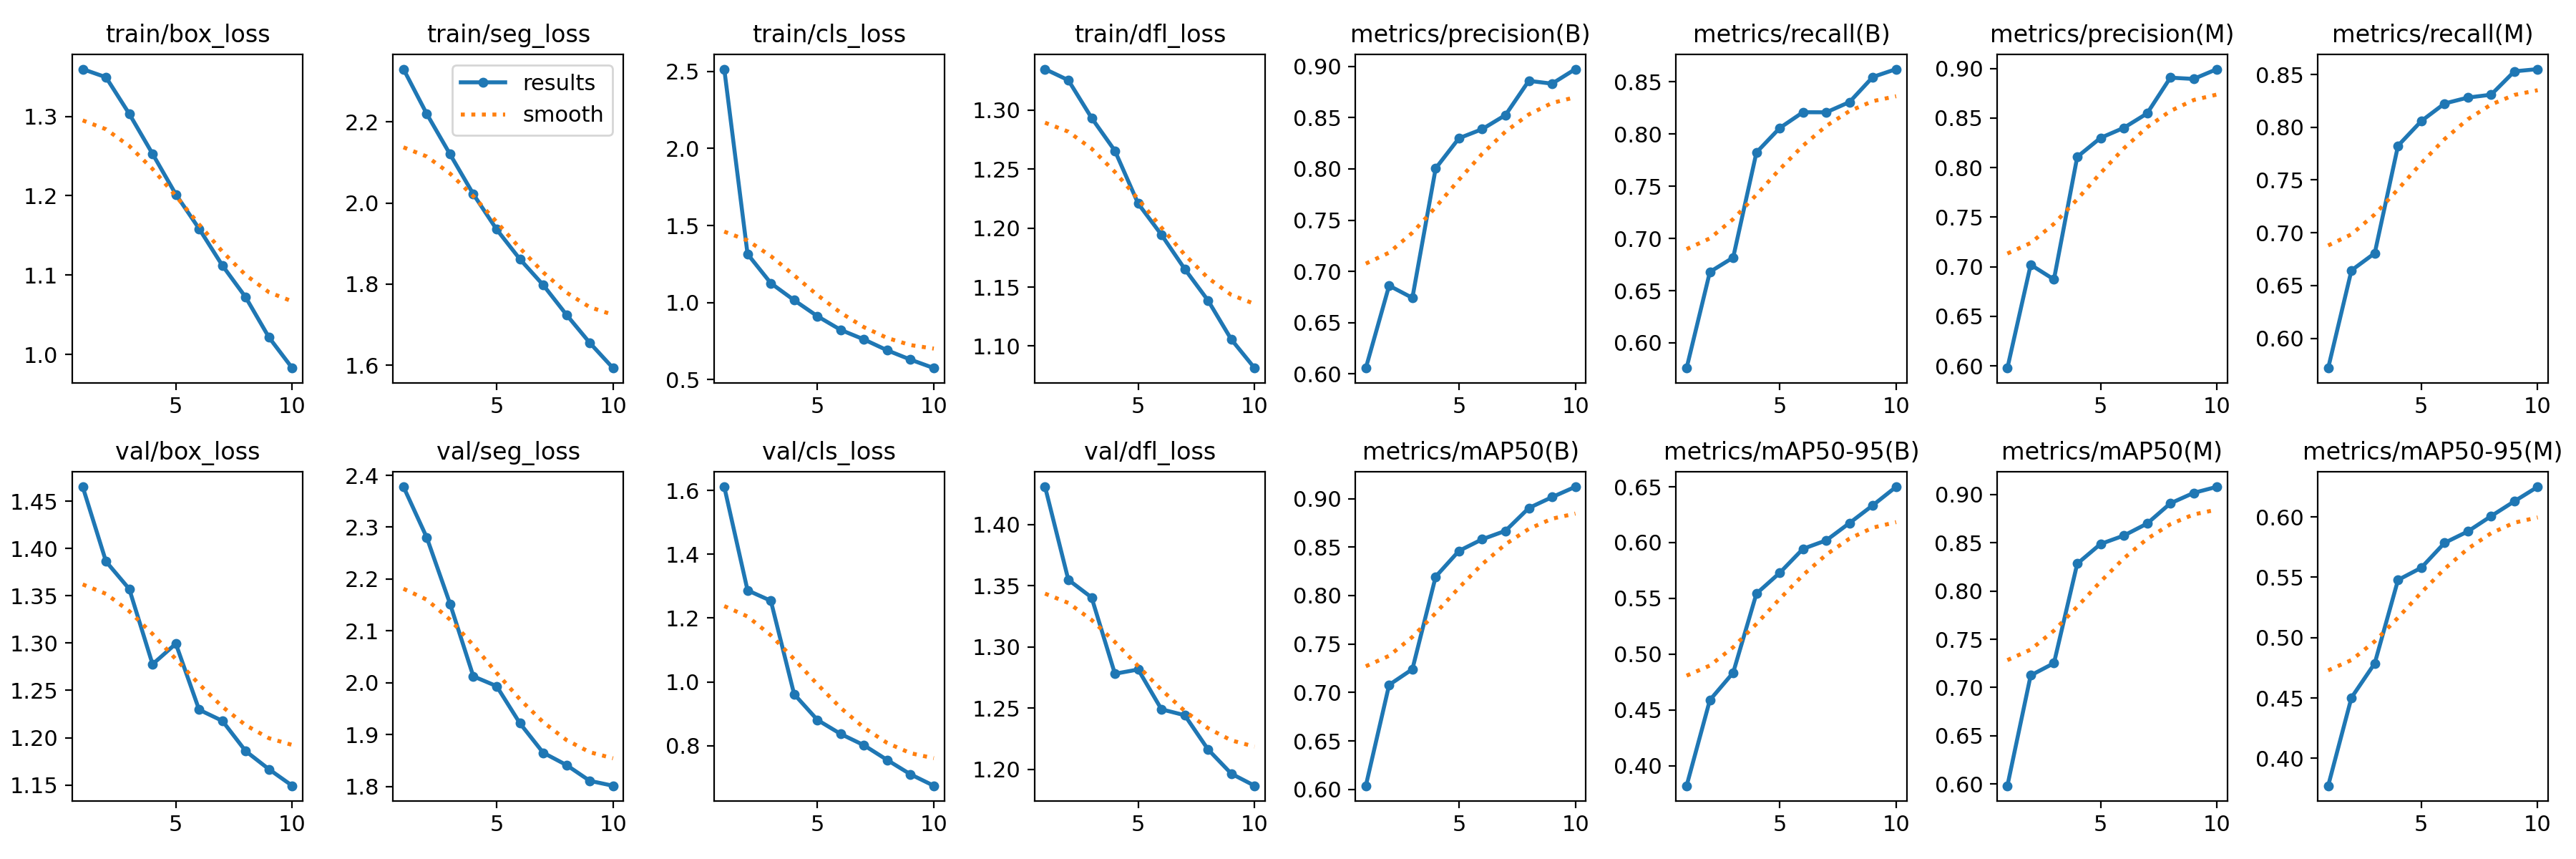

In [11]:
from IPython.display import display, Image
Image('/content/runs/segment/train/results.png', height=400, width=1000)

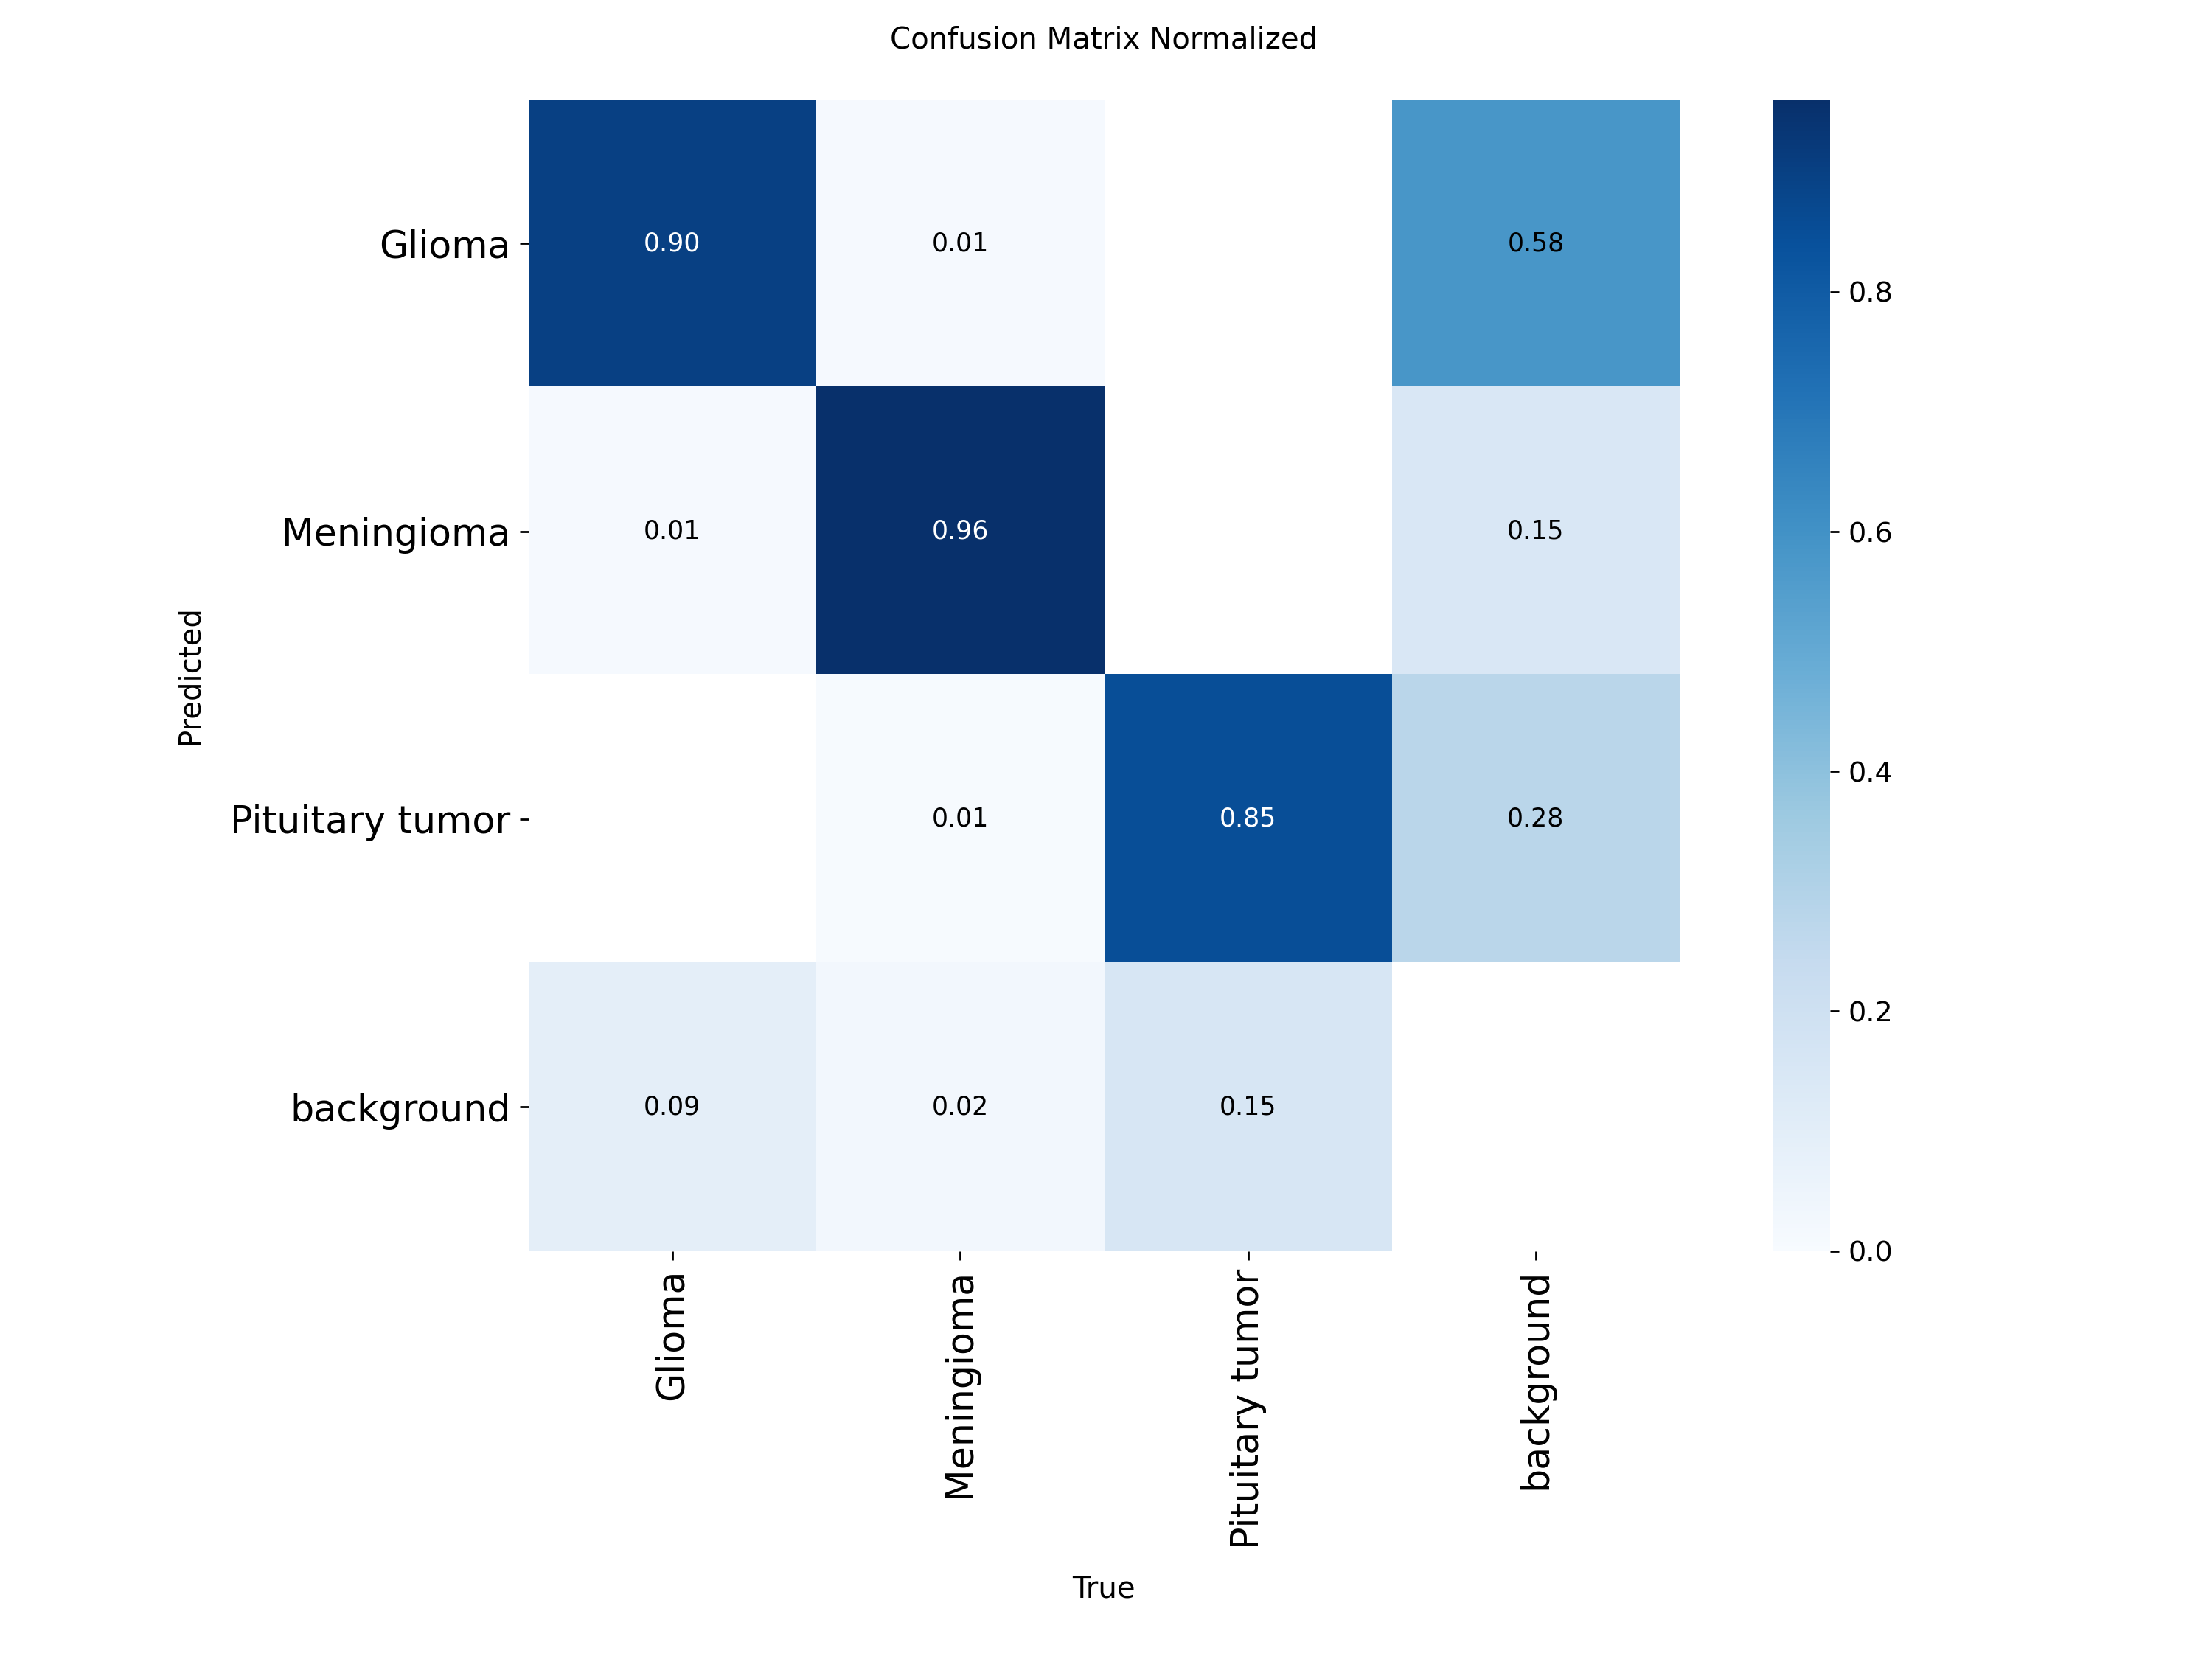

In [12]:
Image('/content/runs/segment/train/confusion_matrix_normalized.png', width=600)

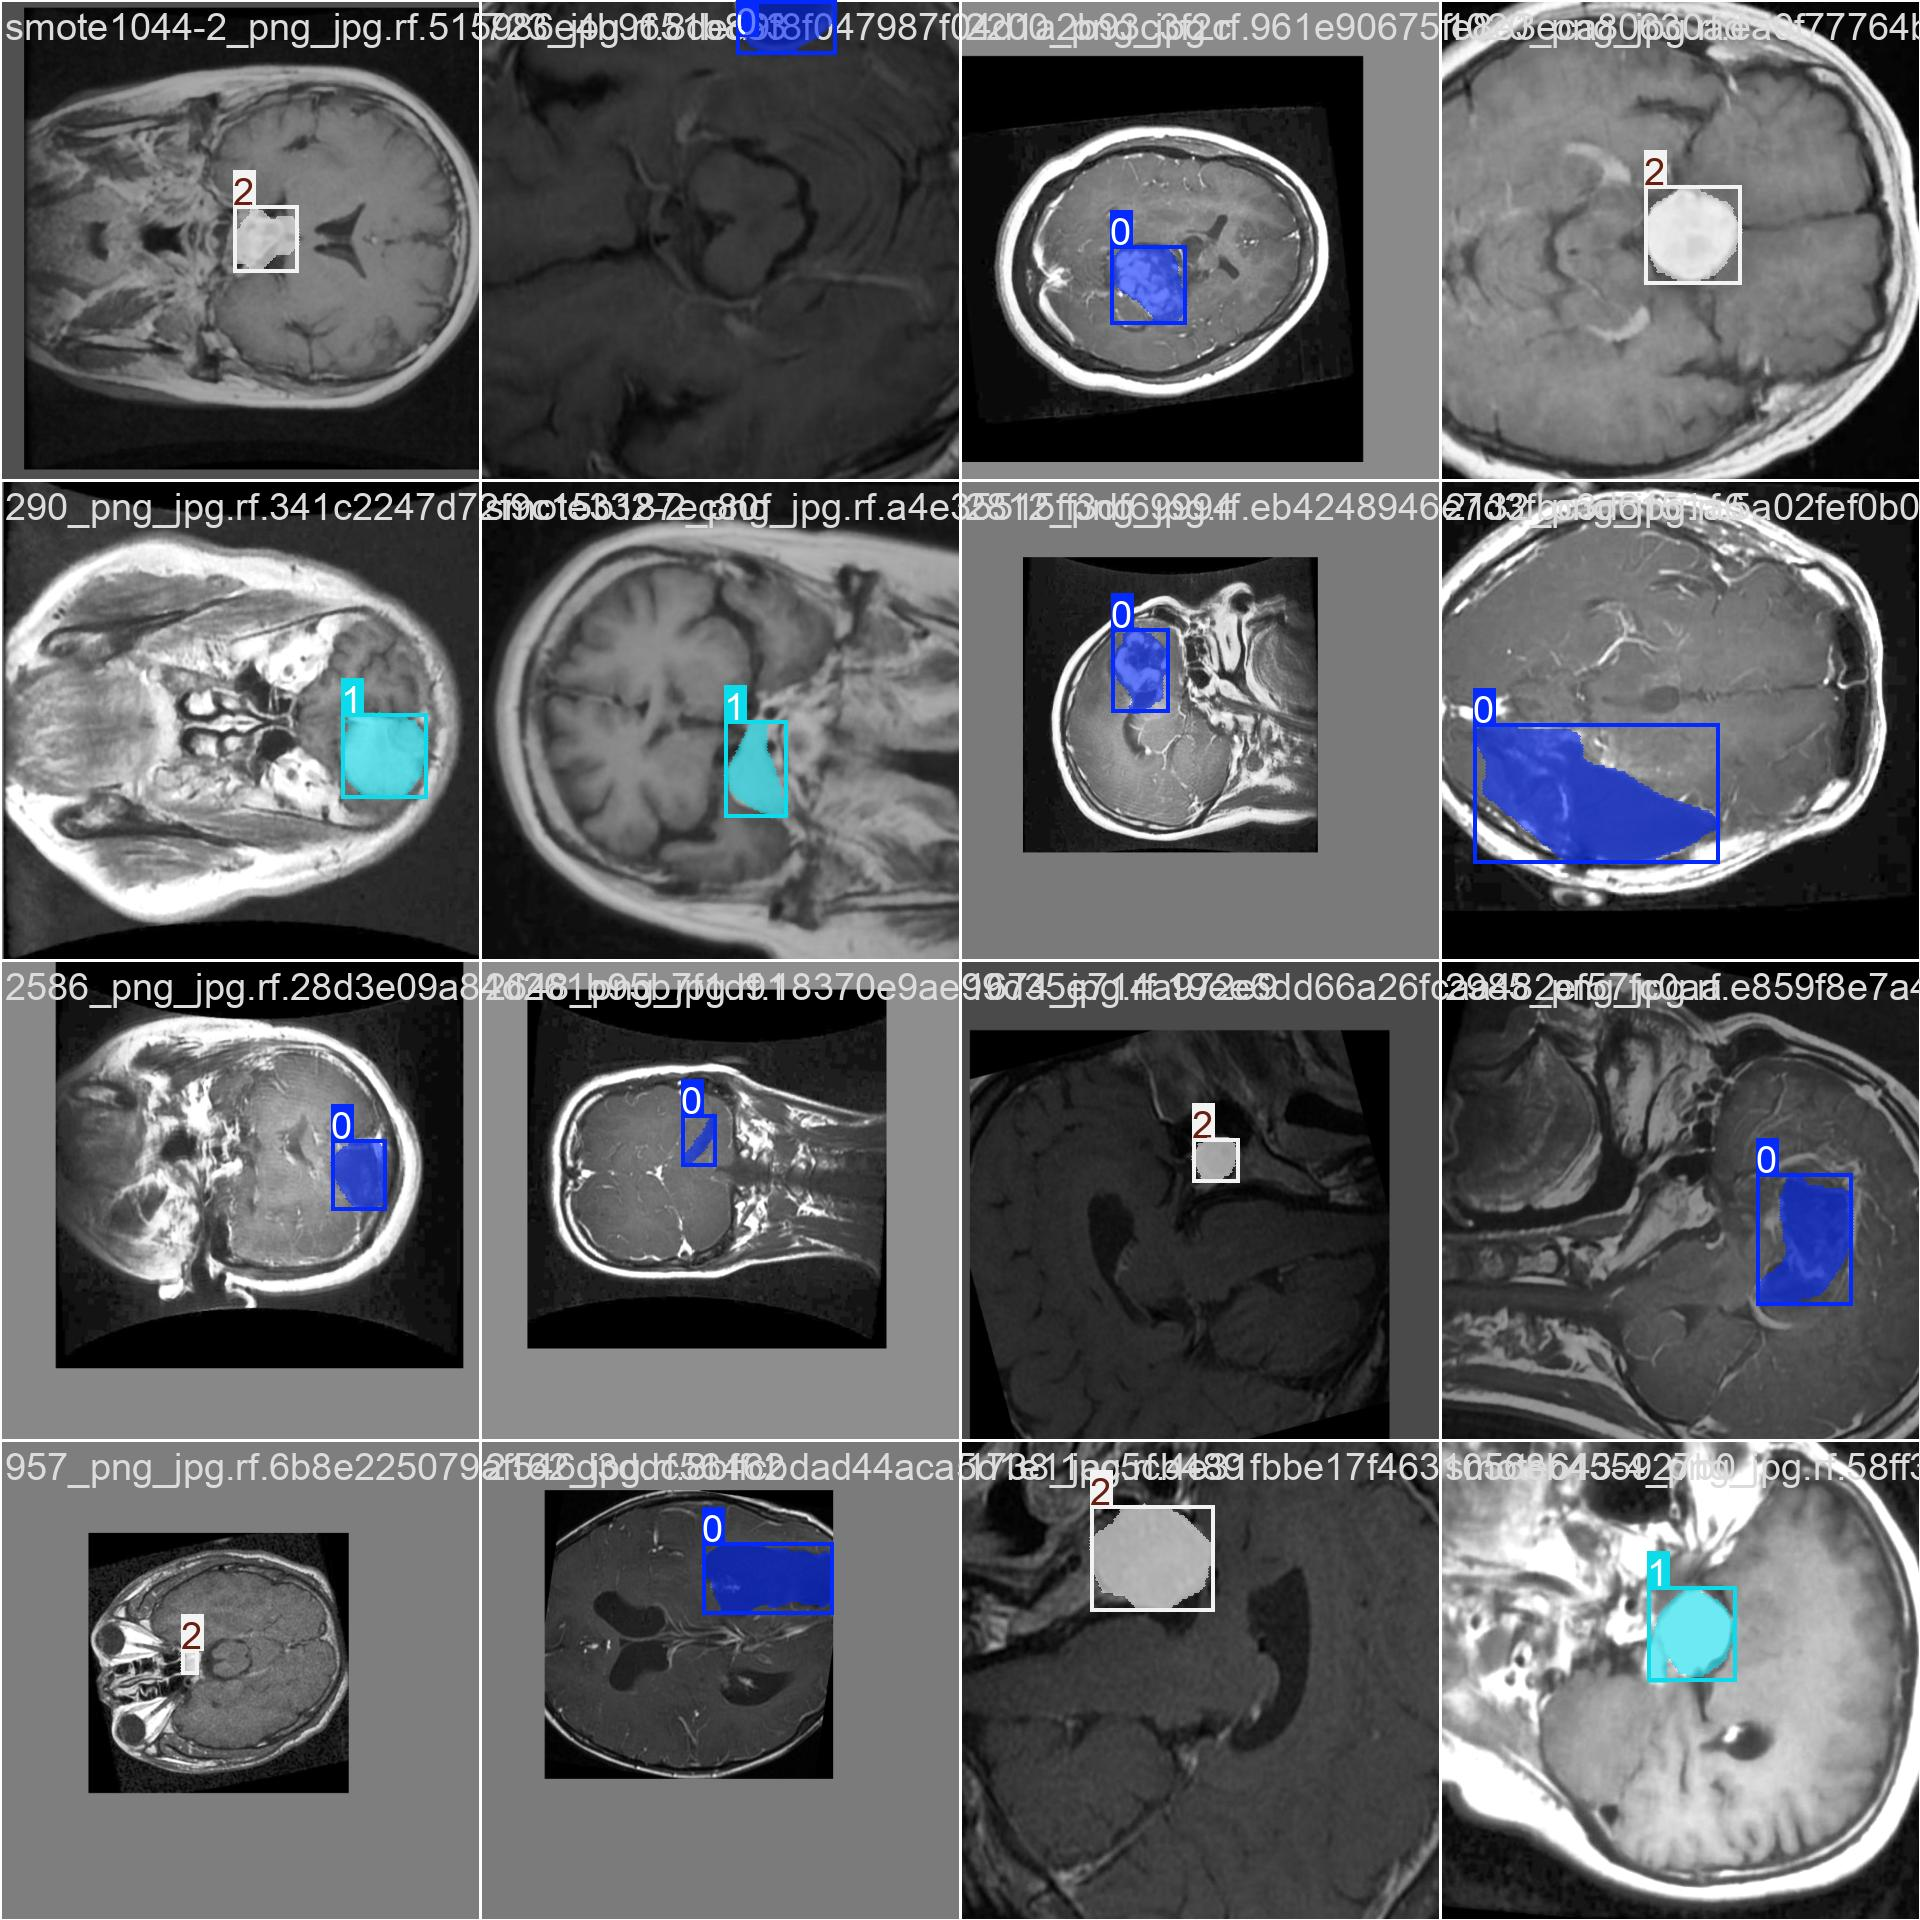

In [13]:
Image('/content/runs/segment/train/train_batch0.jpg')

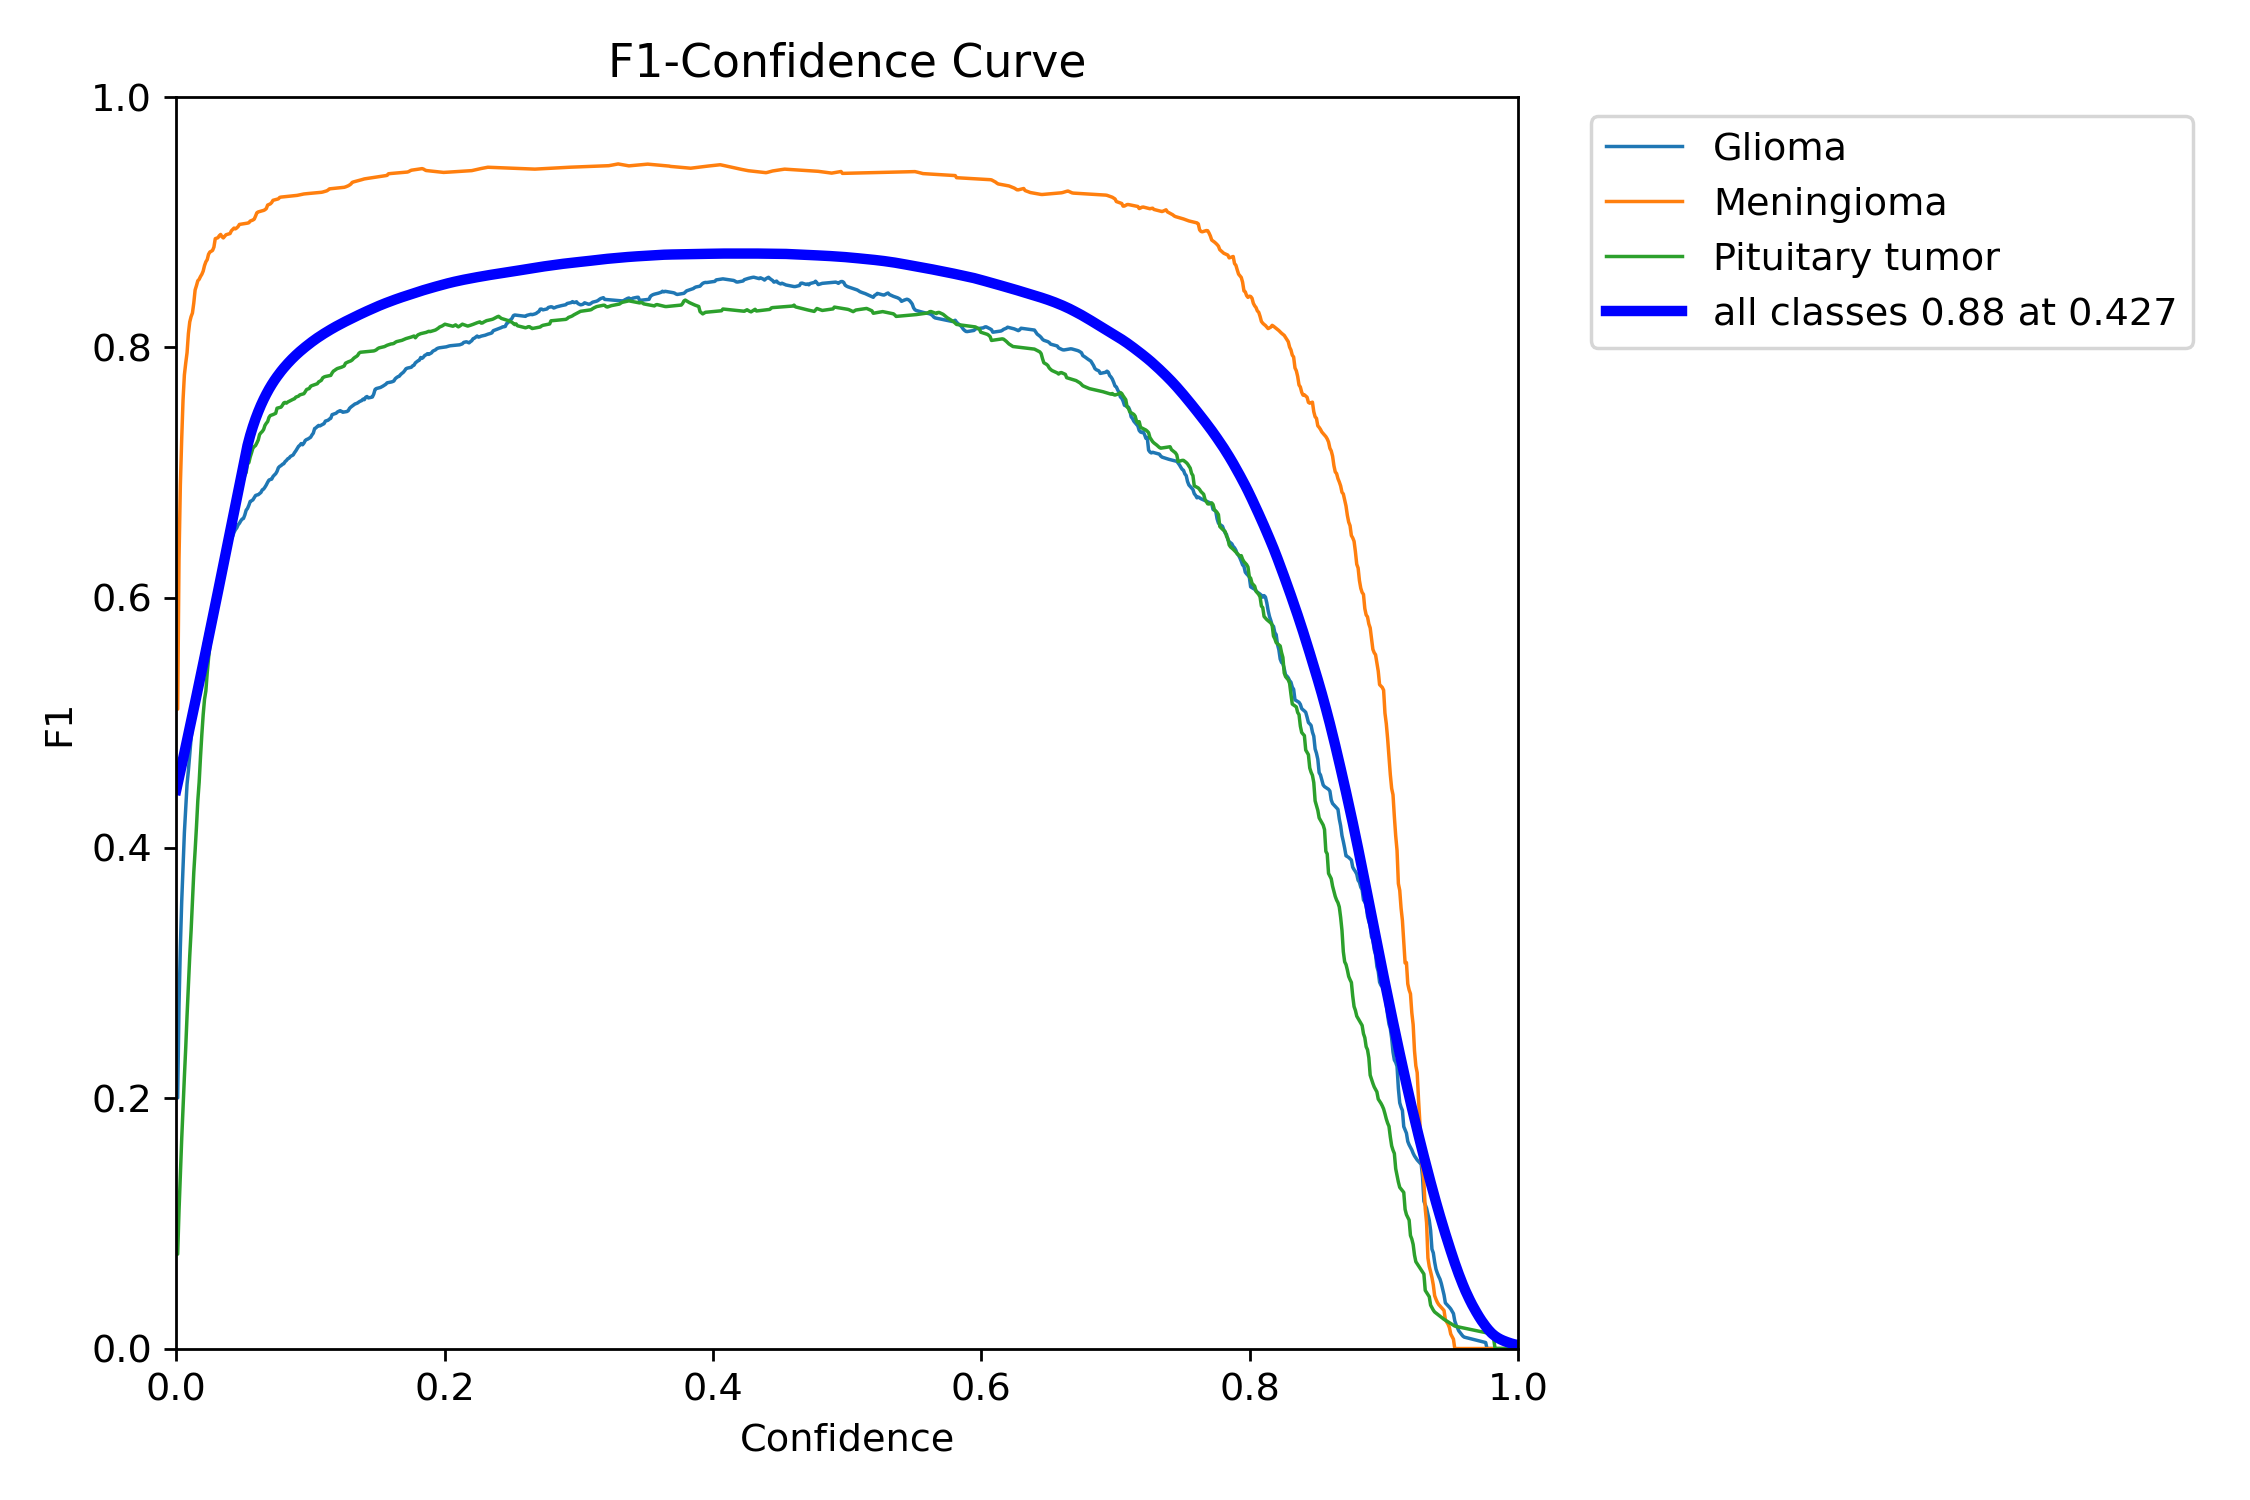

In [14]:
Image('/content/runs/segment/train/MaskF1_curve.png', height=400, width=600)

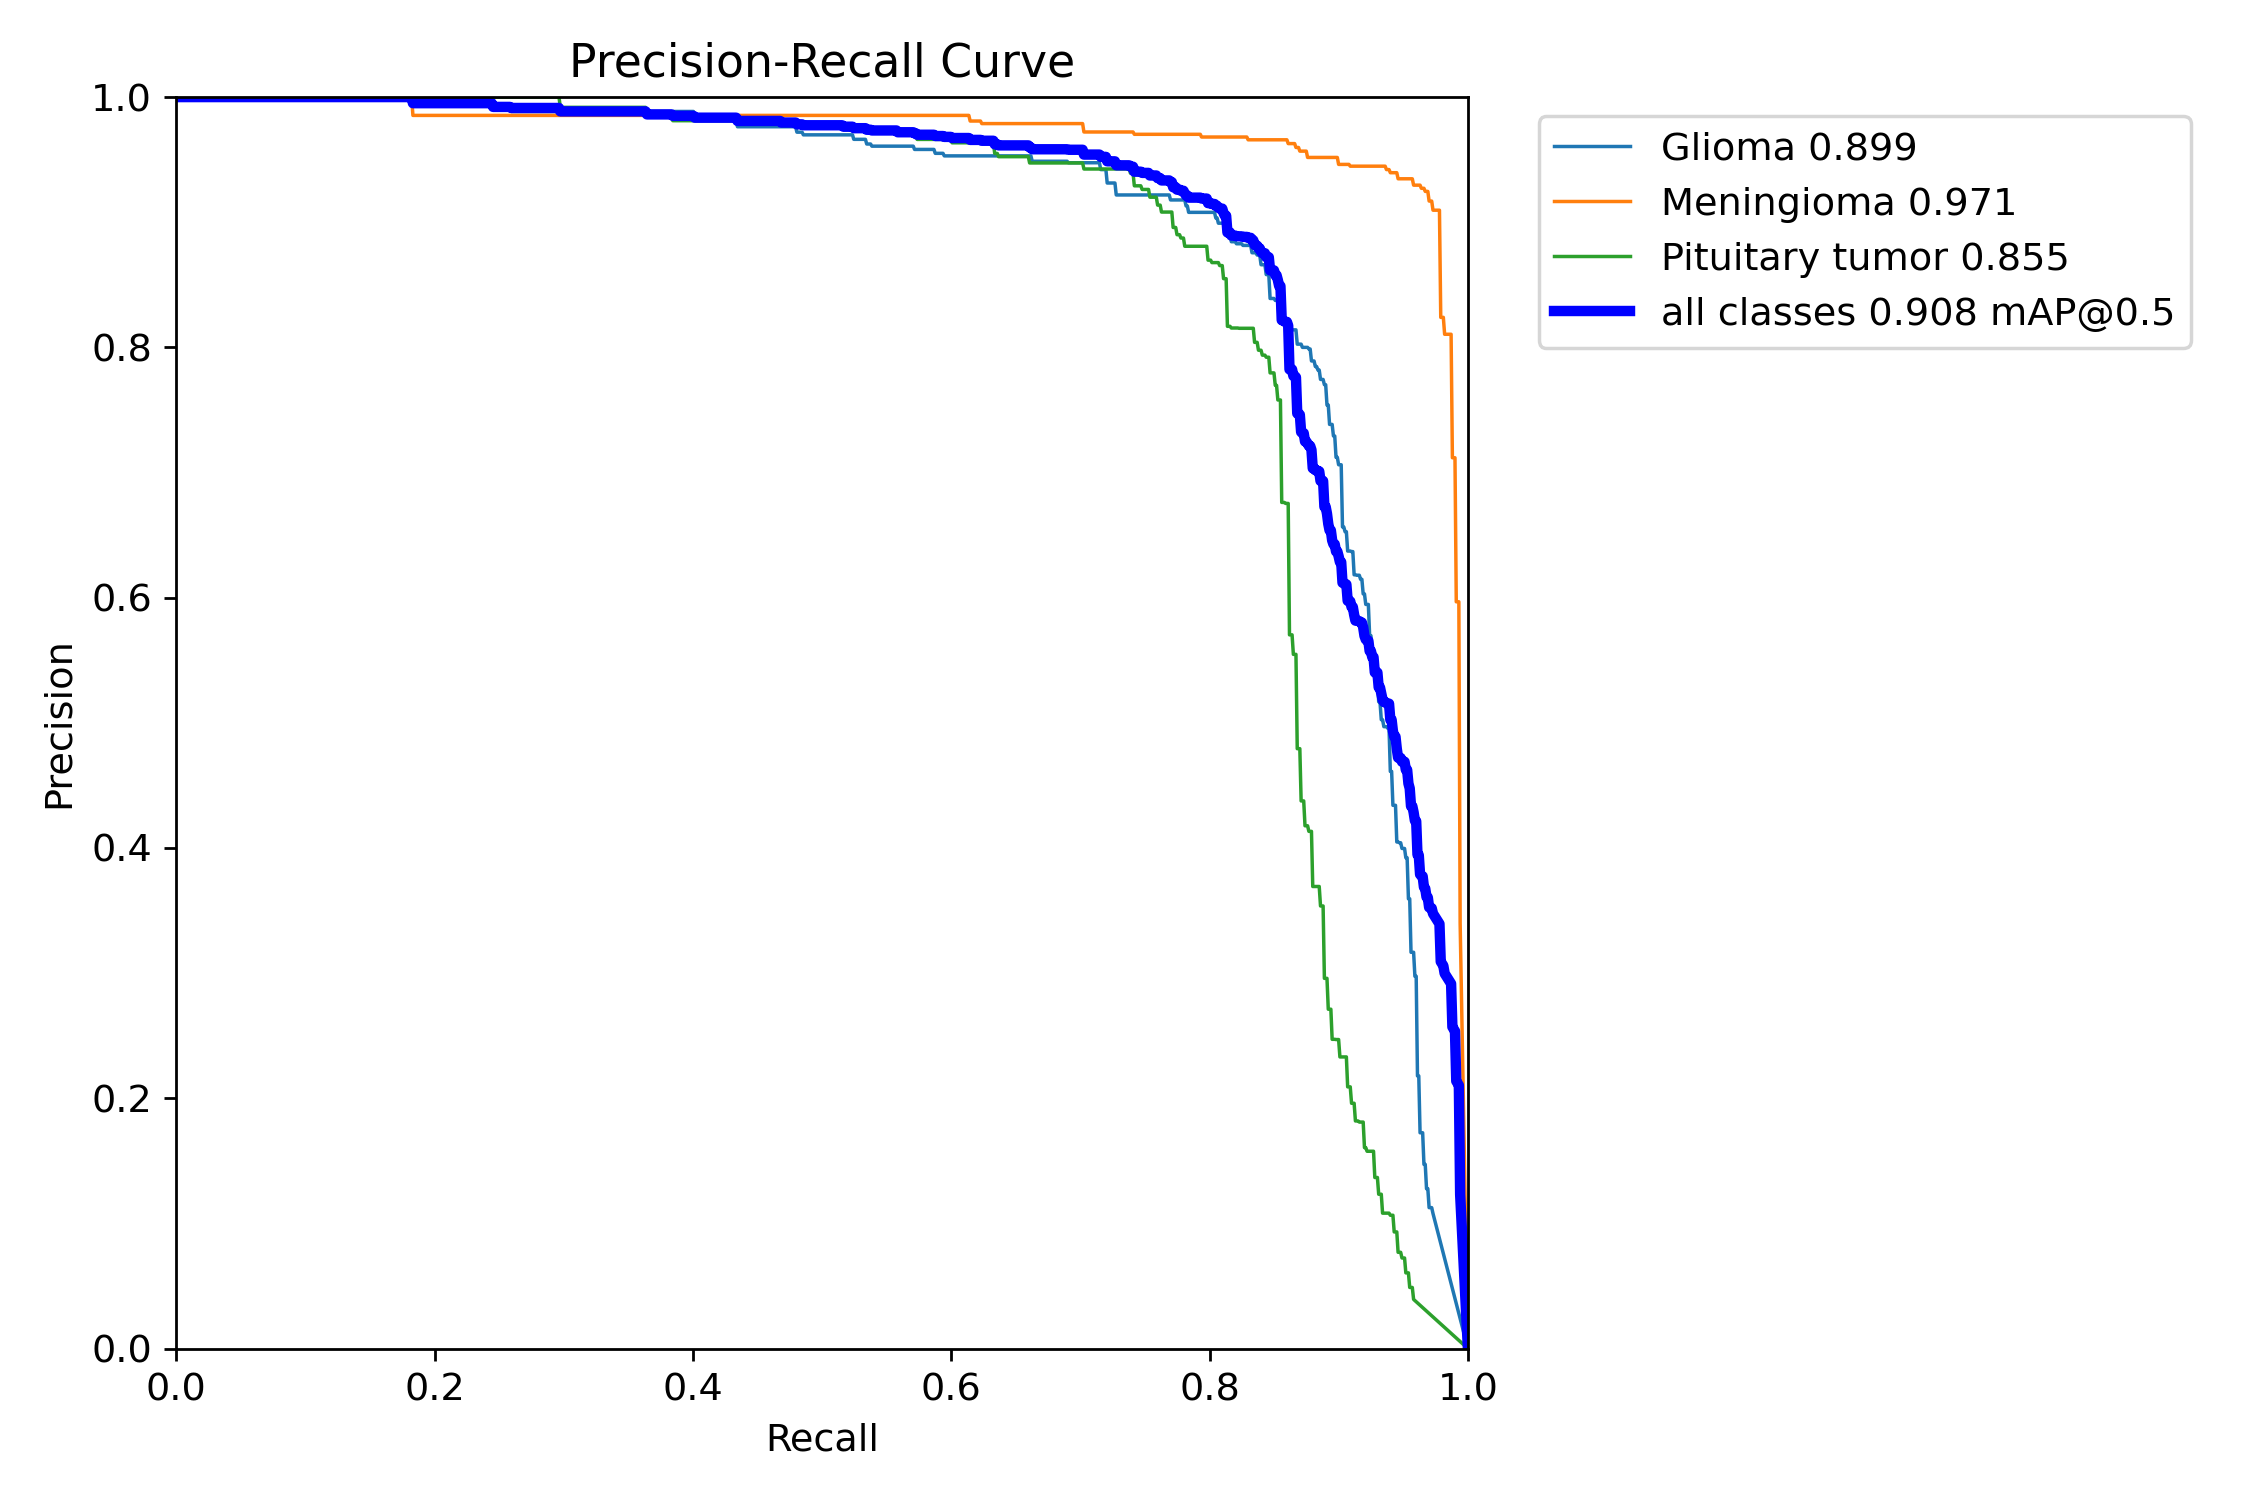

In [15]:
Image('/content/runs/segment/train/MaskPR_curve.png', height=400, width=600)

In [16]:
# Run inference on test images
test_results = model.predict(
    source="tumorneuro-1/test/images/",  # path to test images
    conf=0.25,  # confidence threshold (adjust based on your needs)
    save=True,  # save predictions
    save_txt=True,  # save results to .txt file
    save_conf=True,  # save confidence scores in txt file
    show=False,  # show results (for Jupyter/Colab)
    show_labels=True,  # show labels
    show_conf=True,  # show confidence scores
    device=0  # use GPU (0) for inference
)


image 1/742 /content/tumorneuro-1/test/images/1008_jpg.rf.c1a1c897ebaa3d31943b06031bf8edb6.jpg: 640x640 1 Pituitary tumor, 11.0ms
image 2/742 /content/tumorneuro-1/test/images/1010_jpg.rf.fd89f4a99158c0204879c6d59494584e.jpg: 640x640 1 Pituitary tumor, 11.4ms
image 3/742 /content/tumorneuro-1/test/images/1014_jpg.rf.eb35bbf04870c1468328ef4a62475de7.jpg: 640x640 1 Pituitary tumor, 11.4ms
image 4/742 /content/tumorneuro-1/test/images/1014_png_jpg.rf.7e7bb876f21055515806526e410b2dfd.jpg: 640x640 1 Pituitary tumor, 10.3ms
image 5/742 /content/tumorneuro-1/test/images/101_png_jpg.rf.1e018613203bc750d8ff0e6d82b0ff2c.jpg: 640x640 1 Meningioma, 10.1ms
image 6/742 /content/tumorneuro-1/test/images/1035_jpg.rf.bb1bb01c02817cc3919804af2f131f27.jpg: 640x640 1 Pituitary tumor, 10.2ms
image 7/742 /content/tumorneuro-1/test/images/1039_jpg.rf.bd6dc4f1c19c6f03a9250b3e5ea48105.jpg: 640x640 1 Pituitary tumor, 10.3ms
image 8/742 /content/tumorneuro-1/test/images/1048_png_jpg.rf.b7137e097eda2eaccecb13596

In [17]:
# Set number of samples to show per class
max_samples_per_class = 2  # Show 2 examples per tumor type

# Initialize counter for each class
samples_shown = {
    'Glioma': 0,
    'Meningioma': 0,
    'Pituitary tumor': 0
}

# Get class names from model (verify order matches your dataset)
class_names = model.names  # Should be ['Glioma', 'Meningioma', 'Pituitary tumor']

for result in test_results:
    # Stop when we've shown enough samples for all classes
    if all(count >= max_samples_per_class for count in samples_shown.values()):
        break

    # Skip images with no detections
    if result.boxes is None or len(result.boxes) == 0:
        continue

    # Track classes in current image
    present_classes = set()

    # Collect class information
    for box in result.boxes:
        cls_idx = int(box.cls)
        present_classes.add(class_names[cls_idx])

    # Check if we need to display this image
    display_image = False
    for cls in present_classes:
        if samples_shown[cls] < max_samples_per_class:
            display_image = True
            break

    if not display_image:
        continue

    # Show the image and results
    result.show()
    print(f"\n--- Image: {os.path.basename(result.path)} ---")
    print(f"Detected {len(result.boxes)} tumor(s)")

    # Print detailed information
    for i, (box, mask, score, cls) in enumerate(zip(result.boxes, result.masks,
                                                  result.boxes.conf, result.boxes.cls)):
        cls_name = class_names[int(cls)]
        print(f"\nTumor {i+1}:")
        print(f"  Type: {cls_name}")
        print(f"  Confidence: {score:.2f}")
        print(f"  BBox: {[round(x) for x in box.xyxy[0].tolist()]}")
        print(f"  Mask points: {len(mask.xy[0])} coordinates")

    # Update counters for shown classes
    for cls in present_classes:
        if samples_shown[cls] < max_samples_per_class:
            samples_shown[cls] += 1

print("\nSamples shown per class:")
for cls, count in samples_shown.items():
    print(f"{cls}: {count} example(s)")

Output hidden; open in https://colab.research.google.com to view.

In [18]:
# Save the model
model.export(format="onnx")  # You can export to other formats like ONNX, TensorRT, etc.

Ultralytics 8.3.150 🚀 Python-3.11.12 torch-2.6.0+cu124 CPU (Intel Xeon 2.00GHz)
💡 ProTip: Export to OpenVINO format for best performance on Intel CPUs. Learn more at https://docs.ultralytics.com/integrations/openvino/

PyTorch: starting from 'runs/segment/train/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) ((1, 39, 8400), (1, 32, 160, 160)) (5.7 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0,<1.18.0', 'onnxslim>=0.1.56', 'onnxruntime-gpu'] not found, attempting AutoUpdate...

requirements: AutoUpdate success ✅ 8.0s
WARNING ⚠️ requirements: Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.17.0 opset 19...
ONNX: slimming with onnxslim 0.1.56...
ONNX: export success ✅ 9.9s, saved as 'runs/segment/train/weights/best.onnx' (11.1 MB)

Export complete (10.5s)
Results saved to /content/runs/segment/train/weights
Predict:         yolo predict task=segment model=runs/segment/train/weights/best.onnx imgsz=640 

'runs/segment/train/weights/best.onnx'

In [ ]:
# Copy the ONNX Model to Google Drive
import shutil

# Define the source and destination paths
source_path = '/content/runs/segment/train/weights/best.onnx'  # Path to the exported ONNX model
destination_path = '/content/drive/MyDrive/Colab Notebooks/best.onnx'  # Path in Google Drive

# Copy the file to Google Drive
shutil.copy(source_path, destination_path)

print(f"Model saved to Google Drive at: {destination_path}")

Model saved to Google Drive at: /content/drive/MyDrive/Colab Notebooks/best.onnx


In [ ]:
# Deploy the Model

### **Deploy the Model**

In [3]:
# Google Colab's base image sometimes uses the ASCII (ANSI_X3.4-1968) locale instead of UTF-8. gradio requires UTF-8 encoding for proper installation and operation.
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

In [4]:
# Install required packages
!pip install gradio

In [ ]:
import gradio as gr
from ultralytics import YOLO
import cv2
import numpy as np

# Load your trained model
model = YOLO("/content/drive/MyDrive/Colab Notebooks/best.onnx")  # Update path if needed

def detect_tumor(image):
    # Convert from Gradio's RGB to OpenCV's BGR format
    image_bgr = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

    # Run inference
    results = model.predict(image_bgr, conf=0.25)

    # Process results
    output_image = None
    response = []

    for result in results:
        # Get annotated image with boxes and masks
        annotated_image = result.plot()  # Returns BGR image with annotations
        output_image = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)

        # Prepare text response
        if result.boxes:
            for box, cls in zip(result.boxes, result.boxes.cls):
                class_name = model.names[int(cls)]
                confidence = float(box.conf[0])
                response.append({
                    "Type": class_name,
                    "Confidence": f"{confidence:.2%}",
                    "BBox": [round(x) for x in box.xyxy[0].tolist()]
                })
        else:
            response.append({"Result": "No tumors detected"})

    return output_image, response

# Create Gradio interface
interface = gr.Interface(
    fn=detect_tumor,
    inputs=gr.Image(label="Upload Brain Scan"),
    outputs=[
        gr.Image(label="Detection Result"),
        gr.JSON(label="Detection Details")
    ],
    title="Brain Tumor Detection System",
    description="Upload a brain MRI scan to detect tumors (Glioma, Meningioma, Pituitary)",

)

# Launch the app
interface.launch(debug=True, share=True)

WARNING ⚠️ Unable to automatically guess model task, assuming 'task=detect'. Explicitly define task for your model, i.e. 'task=detect', 'segment', 'classify','pose' or 'obb'.
Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://3ff336ef8d1958c775.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Loading /content/drive/MyDrive/Colab Notebooks/best.onnx for ONNX Runtime inference...
Using ONNX Runtime CPUExecutionProvider



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/gradio/queueing.py", line 625, in process_events
    response = await route_utils.call_process_api(
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/gradio/route_utils.py", line 322, in call_process_api
    output = await app.get_blocks().process_api(
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/gradio/blocks.py", line 2191, in process_api
    result = await self.call_function(
             ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/gradio/blocks.py", line 1702, in call_function
    prediction = await anyio.to_thread.run_sync(  # type: ignore
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/anyio/to_thread.py", line 56, in run_sync
    return await get_async_backend().run_sync_in_worker_thread(
           ^^^^^